## XGBOOST

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split


In [5]:
df=pd.read_csv('telco.csv')

In [8]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Under 30                              object
Senior Citizen                        object
Married                               object
Dependents                            object
Number of Dependents                   int64
Country                               object
State                                 object
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Population                             int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple L

In [ ]:
df.drop(['Customer ID','Under 30','Dependents','Zip Code','Population','Quarter','Referred a Friend','Avg Monthly Long Distance Charges','Paperless Billing','Total Long Distance Charges','Customer Status','Churn Score','CLTV','Churn Category','Churn Reason'],axis=1,inplace=True)

In [28]:
df.head()

,Gender,Age,Under 30,Senior Citizen,Married,Number of Dependents,Country,State,City,Latitude,...,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Revenue,Satisfaction Score,Churn Label
0,Male,78,No,Yes,No,0,United States,California,Los Angeles,34.023810,...,No,Month-to-Month,Bank Withdrawal,39.65,39.65,0.00,20,59.65,3,Yes
1,Female,74,No,Yes,Yes,1,United States,California,Los Angeles,34.044271,...,Yes,Month-to-Month,Credit Card,80.65,633.30,0.00,0,1024.10,3,Yes
2,Male,71,No,Yes,No,3,United States,California,Los Angeles,34.108833,...,Yes,Month-to-Month,Bank Withdrawal,95.45,1752.55,45.61,0,1910.88,2,Yes
3,Female,78,No,Yes,Yes,1,United States,California,Inglewood,33.936291,...,Yes,Month-to-Month,Bank Withdrawal,98.50,2514.50,13.43,0,2995.07,2,Yes
4,Female,80,No,Yes,Yes,1,United States,California,Whittier,33.972119,...,Yes,Month-to-Month,Bank Withdrawal,76.50,2868.15,0.00,0,3102.36,2,Yes


In [37]:
df.dtypes

Gender                       object
Age                           int64
Senior Citizen               object
Married                       int64
Number of Dependents          int64
Country                      object
State                        object
City                         object
Latitude                    float64
Longitude                   float64
Number of Referrals           int64
Tenure in Months              int64
Offer                        object
Phone Service                object
Multiple Lines               object
Internet Service             object
Internet Type                object
Avg Monthly GB Download       int64
Online Security              object
Online Backup                object
Device Protection Plan       object
Premium Tech Support         object
Streaming TV                 object
Streaming Movies             object
Streaming Music              object
Unlimited Data               object
Contract                     object
Payment Method              

In [49]:
df['Contract'].unique()

array(['Month-to-Month', 'One Year', 'Two Year'], dtype=object)

In [50]:
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
df['Senior Citizen'] = df['Senior Citizen'].replace({'Yes': 1, 'No': 0})
df['Phone Service'] = df['Phone Service'].replace({'Yes': 1, 'No': 0})
df['Multiple Lines'] = df['Multiple Lines'].replace({'Yes': 1, 'No': 0})
df['Internet Service'] = df['Internet Service'].replace({'Yes': 1, 'No': 0})
df['Online Security'] = df['Online Security'].replace({'Yes': 1, 'No': 0})
df['Online Backup'] = df['Online Backup'].replace({'Yes': 1, 'No': 0})
df['Device Protection Plan'] = df['Device Protection Plan'].replace({'Yes': 1, 'No': 0})
df['Premium Tech Support'] = df['Premium Tech Support'].replace({'Yes': 1, 'No': 0})
df['Streaming TV'] = df['Streaming TV'].replace({'Yes': 1, 'No': 0})
df['Streaming Movies'] = df['Streaming Movies'].replace({'Yes': 1, 'No': 0})
df['Streaming Music'] = df['Streaming Music'].replace({'Yes': 1, 'No': 0})
df['Unlimited Data'] = df['Unlimited Data'].replace({'Yes': 1, 'No': 0})
df['Churn Label'] = df['Churn Label'].replace({'Yes': 1, 'No': 0})

C:\Users\Surbhi\AppData\Local\Temp\ipykernel_11012\1042593085.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Senior Citizen'] = df['Senior Citizen'].replace({'Yes': 1, 'No': 0})
C:\Users\Surbhi\AppData\Local\Temp\ipykernel_11012\1042593085.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Phone Service'] = df['Phone Service'].replace({'Yes': 1, 'No': 0})
C:\Users\Surbhi\AppData\Local\Temp\ipykernel_11012\1042593085.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future v

In [51]:
df.dtypes

Gender                       object
Age                           int64
Senior Citizen                int64
Married                       int64
Number of Dependents          int64
Country                      object
State                        object
City                         object
Latitude                    float64
Longitude                   float64
Number of Referrals           int64
Tenure in Months              int64
Offer                        object
Phone Service                 int64
Multiple Lines                int64
Internet Service              int64
Internet Type                object
Avg Monthly GB Download       int64
Online Security               int64
Online Backup                 int64
Device Protection Plan        int64
Premium Tech Support          int64
Streaming TV                  int64
Streaming Movies              int64
Streaming Music               int64
Unlimited Data                int64
Contract                     object
Payment Method              

In [53]:
X=df.drop('Churn Label',axis=1)

In [55]:
X=pd.get_dummies(X,columns=['Gender','Country','State','City','Offer','Internet Type','Contract','Payment Method'])

In [62]:
y=df['Churn Label']

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0,stratify=y)

In [66]:
train=xgb.DMatrix(X_train,label=y_train)
test=xgb.DMatrix(X_test,label=y_test)

In [67]:
param = {
    'max_depth': 4,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'num_class': 1} 
epochs = 50 

In [68]:
model = xgb.train(param, train, epochs)

In [71]:
predictions = [1 if x > 0.5 else 0 for x in predictions]

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9730305180979418

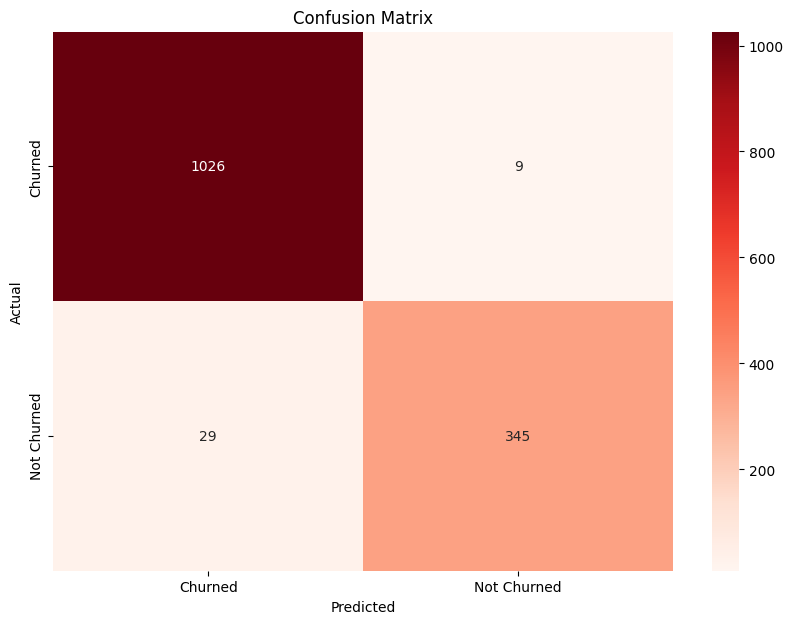

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Churned','Not Churned'], yticklabels=['Churned','Not Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()